# Wine Quality Data Analysis Using Random Forest, Artificial Neural Network, and Gridsearch #

## Jon Werthman and Tom Peters ##


In [41]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import pyplot
sns.set(style='white', context='notebook', palette='deep')
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix 
from sklearn.preprocessing import StandardScaler
import os
%config Completer.use_jedi = False

In [42]:
columns=["fixed acidity","volatile acidity","citric acid","residual sugar","chlorides","free sulfur dioxide","total sulfur dioxide","density","pH","sulphates","alcohol","quality"]
os.path.join(os.getcwd(), 'winequality-red.csv')
wine = pd.read_csv("winequality-red.csv",sep = ';', usecols=columns)
#prints out the number of wines in each quality category
wine.quality.value_counts()



5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

## Correlation Grid of Features ##

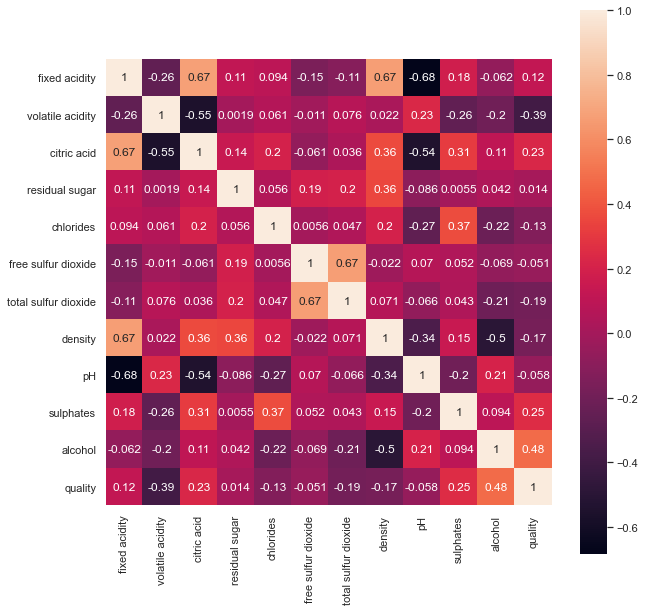

Correlation of different features of our dataset with quality:
fixed acidity : 0.1241
volatile acidity : -0.3906
citric acid : 0.2264
residual sugar : 0.0137
chlorides : -0.1289
free sulfur dioxide : -0.0507
total sulfur dioxide : -0.1851
density : -0.1749
pH : -0.0577
sulphates : 0.2514
alcohol : 0.4762
quality : 1.0000


In [43]:
plt.figure(figsize=(10, 10))
sns.heatmap(wine.corr(method='pearson'), annot=True, square=True)
plt.show()

print('Correlation of different features of our dataset with quality:')
for i in wine.columns:
  corr, _ = pearsonr(wine[i], wine['quality'])
  print('%s : %.4f' %(i,corr))

In [44]:
wine = wine.drop('residual sugar', axis = 1)
wine = wine.drop('fixed acidity', axis = 1)
wine = wine.drop('free sulfur dioxide', axis = 1)

# Updated Heat Map With Dropped Columns

(1599, 9)

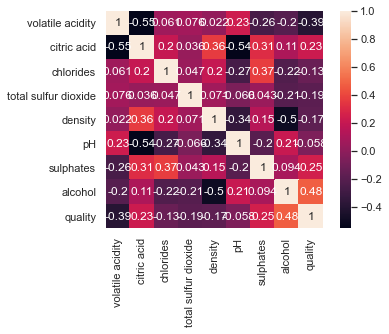

In [45]:
sns.heatmap(wine.corr(method='pearson'), annot=True, square=True)
wine.shape

In [22]:
#new dataset that has dropped the categories least correlated with quality
bins = (2, 6.5, 8)
group_names = ['bad', 'good']
wine['quality'] = pd.cut(wine['quality'], bins = bins, labels = group_names)
wine['quality'] = wine['quality'].map({'bad' : 0, 'good' : 1})
wine.head(15)

,volatile acidity,citric acid,chlorides,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.700,0.00,0.076,34.0,0.9978,3.51,0.56,9.4,0
1,0.880,0.00,0.098,67.0,0.9968,3.20,0.68,9.8,0
2,0.760,0.04,0.092,54.0,0.9970,3.26,0.65,9.8,0
3,0.280,0.56,0.075,60.0,0.9980,3.16,0.58,9.8,0
4,0.700,0.00,0.076,34.0,0.9978,3.51,0.56,9.4,0
5,0.660,0.00,0.075,40.0,0.9978,3.51,0.56,9.4,0
6,0.600,0.06,0.069,59.0,0.9964,3.30,0.46,9.4,0
7,0.650,0.00,0.065,21.0,0.9946,3.39,0.47,10.0,1
8,0.580,0.02,0.073,18.0,0.9968,3.36,0.57,9.5,1
9,0.500,0.36,0.071,102.0,0.9978,3.35,0.80,10.5,0


In [23]:
X = wine.drop('quality', axis = 1)
y = wine['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)


sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [24]:



import itertools

#confusion matrix function for data visualizations

def plot_confusion_matrix(cm, classes, normalize = False,
                          title='Confusion matrix',
                          cmap=plt.cm.Greens): # can change color 
    plt.figure(figsize = (5, 5))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, size = 24)
    plt.colorbar(aspect=4)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, size = 14)
    plt.yticks(tick_marks, classes, size = 14)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    # Label the plot
    for i, j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
             plt.text(j, i, format(cm[i, j], fmt), 
             fontsize = 20,
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")
    
    plt.tight_layout()
    plt.ylabel('True label', size = 18)
    plt.xlabel('Predicted label', size = 18)



## RFC ##

     Actual  Predicted
803       0          0
124       0          0
350       0          0
682       0          0
1326      0          0

Confussion matrix:
[[261  12]
 [ 28  19]]


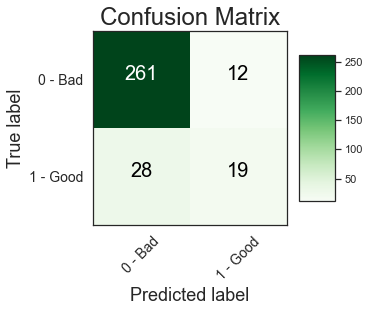

In [25]:
rfc = RandomForestClassifier(n_estimators=25, criterion='gini', random_state=0,)
rfc.fit(X_train, y_train)
pred_rf = rfc.predict(X_test)
Y_compare_rfc = pd.DataFrame({'Actual' : y_test, 'Predicted' : pred_rf})
print(Y_compare_rfc.head())
print('\nConfussion matrix:')
print(confusion_matrix(y_test, pred_rf))


cm = confusion_matrix(y_test, pred_rf)
plot_confusion_matrix(cm, classes = ['0 - Bad', '1 - Good'],
                      title = 'Confusion Matrix')


Confussion matrix:
[[245  28]
 [ 22  25]]


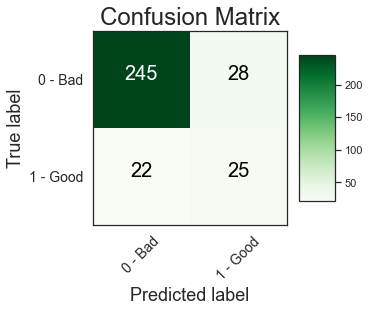

In [38]:
ANN = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(100,), random_state=1)
ANN.fit(X_train, y_train)
pred_ANN = ANN.predict(X_test)
Y_compare_ANN = pd.DataFrame({'Actual' : y_test, 'Predicted' : pred_ANN})

print('\nConfussion matrix:')
print(confusion_matrix(y_test, pred_ANN))


cm = confusion_matrix(y_test, pred_ANN)
plot_confusion_matrix(cm, classes = ['0 - Bad', '1 - Good'],
                      title = 'Confusion Matrix')

## SVM ##


Confusion Matrix: 
[[268   5]
 [ 37  10]]


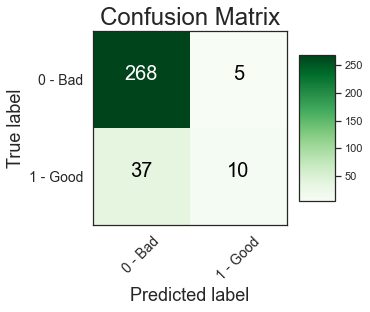

In [39]:
svm = SVC(kernel = 'rbf', degree = 10, random_state = 1)
svm.fit(X_train, y_train)
pred_svm = svm.predict(X_test)

Y_compare_svm = pd.DataFrame({'Actual': y_test, 'Predicted': pred_svm})


print('\nConfusion Matrix: ')
print(confusion_matrix(y_test, pred_svm))
#print(classification_report(y_test, pred_svc))

cm = confusion_matrix(y_test, pred_svm)


plot_confusion_matrix(cm, classes = ['0 - Bad', '1 - Good'],
                     title = 'Confusion Matrix')

In [28]:
#calculating the best parameters to start with that give the best accuracy
from sklearn.model_selection import GridSearchCV
c = [.05,.1,1,2,5,10,50,100]

parameters = {
    'C': [.05,.1,1,2,5,10,50,100],
    'kernel':['linear', 'rbf'],
    'gamma' :[0.1,0.8,0.9,1,1.1,1.2,1.3,1.4]
}
update = GridSearchCV(svm, param_grid=parameters, scoring='accuracy', cv = 5)
update.fit(X_train, y_train)
update.best_params_
update.score(X_test, y_test)

print("The best parameters are %s \nwith a score of %0.5f" % (update.best_params_, update.best_score_))


The best parameters are {'C': 2, 'gamma': 1.3, 'kernel': 'rbf'} 
with a score of 0.90698


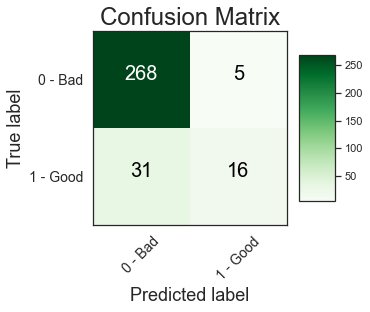

In [29]:
#update weights

svmFix = SVC(C = 1.2, gamma =  0.9, kernel= 'rbf')
svmFix.fit(X_train, y_train)
pred_update2 = svmFix.predict(X_test)
cm = confusion_matrix(y_test, pred_update2)
plot_confusion_matrix(cm, classes = ['0 - Bad', '1 - Good'],
                     title = 'Confusion Matrix')


In [30]:
from sklearn.metrics import mean_squared_error
# error calculations
clf = SVC(kernel='rbf', gamma=0.0017782794100389228,C=10.0)
c = clf.fit(X_train,y_train)

print('Classifier score: ', clf.score(X_test,y_test))
y = c.predict(X_test)
print('Classifier MSE: ',mean_squared_error(y,y_test))

Classifier score:  0.853125
Classifier MSE:  0.146875


In [31]:
#calculating accuracy
modelNames = ['Random Forrest', 'Artificial Neural Network', 'Support Vector Model']
modelClassifiers = [rfc, ANN, svm]
models = pd.DataFrame({'modelNames' : modelNames, 'modelClassifiers' : modelClassifiers})
counter=0
score=[]
for i in models['modelClassifiers']:
  accuracy = cross_val_score(i, X_train, y_train, scoring='accuracy', cv=10)
  print('Accuracy of %s Classification model is %.2f' %(models.iloc[counter,0],accuracy.mean()))
  score.append(accuracy.mean())
  counter+=1

Accuracy of Random Forrest Classification model is 0.91
Accuracy of Artificial Neural Network Classification model is 0.87
Accuracy of Support Vector Model Classification model is 0.89
